In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os, json, ast
from matplotlib.ticker import MaxNLocator

# Loading json files from Steamspy
API from steamspy downloaded as 43 json files were concatnated to form a csv file containing only the appid

In [2]:
path = "../project/steamspy"

json_files = []
for json_file in os.listdir(path):
    if json_file.endswith(".json"):
        each_file = "../project/steamspy/" + json_file
        json_files.append(each_file)

In [3]:
dfs = []
for file in json_files:
    data = pd.read_json(file).transpose()
    dfs.append(data)
steamspy_df = pd.concat(dfs)

In [4]:
appid_df = steamspy_df[["appid", "name"]].sort_values(by=["appid"]).reset_index().drop(["index"], axis=1)
appid_df.to_csv("app_list.csv")

# Loading csv file from Steam & data cleaning
Steam API were parsed with the app_list.csv, resulting in a file named steam_app_data.csv. 
Two dataframes (steam_df & steamspy_df) were merged and specific series were selected for analysis. Data from the merged df were cleaned with various functions.

In [5]:
steam_df = pd.read_csv("steam_app_data.csv", low_memory=False)
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44382 entries, 0 to 44381
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     44284 non-null  object 
 1   name                     44379 non-null  object 
 2   steam_appid              44382 non-null  int64  
 3   required_age             44284 non-null  object 
 4   is_free                  44284 non-null  object 
 5   controller_support       9192 non-null   object 
 6   dlc                      7580 non-null   object 
 7   detailed_description     44254 non-null  object 
 8   about_the_game           44254 non-null  object 
 9   short_description        44255 non-null  object 
 10  fullgame                 0 non-null      float64
 11  supported_languages      44256 non-null  object 
 12  header_image             44284 non-null  object 
 13  website                  26367 non-null  object 
 14  pc_requirements       

In [6]:
steam_df = steam_df.drop(["achievements", "is_free", "controller_support", "dlc", "detailed_description", "about_the_game", "short_description", "screenshots", "movies", "support_info", "fullgame", "header_image", "website", "pc_requirements", "mac_requirements", "linux_requirements", "legal_notice", "drm_notice", "background", "ext_user_account_notice", "required_age", "packages", "metacritic", "package_groups", "demos", "content_descriptors", "reviews", "recommendations", "type"], axis=1)

In [7]:
steam_df.head(5)

,name,steam_appid,supported_languages,developers,publishers,price_overview,platforms,categories,genres,release_date
0,Counter-Strike,10,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'currency': 'CAD', 'initial': 1149, 'final': ...","{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}"
1,Team Fortress Classic,20,"English, French, German, Italian, Spanish - Sp...",['Valve'],['Valve'],"{'currency': 'CAD', 'initial': 569, 'final': 5...","{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Apr, 1999'}"
2,Day of Defeat,30,"English, French, German, Italian, Spanish - Spain",['Valve'],['Valve'],"{'currency': 'CAD', 'initial': 569, 'final': 5...","{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 May, 2003'}"
3,Deathmatch Classic,40,"English, French, German, Italian, Spanish - Sp...",['Valve'],['Valve'],"{'currency': 'CAD', 'initial': 569, 'final': 5...","{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Jun, 2001'}"
4,Half-Life: Opposing Force,50,"English, French, German, Korean",['Gearbox Software'],['Valve'],"{'currency': 'CAD', 'initial': 569, 'final': 5...","{'windows': True, 'mac': True, 'linux': True}","[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 1999'}"


In [8]:
steamspy_df.head(5)

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
570,570,Dota 2,Valve,Valve,,1261538,237040,0,"100,000,000 .. 200,000,000",35164,1838,945,929,0,0,0,573999
578080,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",,931365,786953,0,"50,000,000 .. 100,000,000",24372,750,11059,254,2999,2999,0,366401
730,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,,4892212,660313,0,"50,000,000 .. 100,000,000",28691,995,6656,365,0,0,0,927955
440,440,Team Fortress 2,Valve,Valve,,731064,47261,0,"50,000,000 .. 100,000,000",8752,2250,389,1340,0,0,0,102763
304930,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,,395108,37688,0,"20,000,000 .. 50,000,000",6353,2372,357,413,0,0,0,25940


Duplicates from both dfs are dropped & specific series picked from steamspy and is merged with steam_df

In [9]:
steam_df = steam_df.drop_duplicates(subset=["steam_appid"])
steamspy_df = steamspy_df.drop_duplicates(subset=["appid"])
steamspy_df = steamspy_df[["appid", "positive", "negative", "owners", "ccu", "price", "initialprice", "discount"]]
df = pd.merge(steam_df, steamspy_df, how="inner", left_on="steam_appid", right_on="appid")
df.drop(["appid"], axis=1, inplace=True)
df = df.dropna(subset=["price", "initialprice", "discount"])

Price information from steamspy are used to replace any null values from price_overview of steam_app_list.csv. The price_overview series was separated into 3 different series - initial_price, discount% and final_price. Lastly, price_overview, price_from_steamspy, final, initial, and discount_percent and null are dropped

In [10]:
df.rename(columns={"initialprice": "initial", "price": "final", "discount":"discount_percent"}, inplace=True)
columns = ["initial", "final", "discount_percent"]
df["price_from_steamspy"] = df[columns].to_dict(orient='records')
df["price_overview"] = df["price_overview"].fillna(df["price_from_steamspy"])
def price_change(price, price_type):
    price = str(price)
    price = ast.literal_eval(price)
    for key, value in price.items():
        if key == price_type:
            return int(value)
df["initial_price"] = df["price_overview"].apply(price_change, price_type=("initial"))/100
df["discount%"] = df["price_overview"].apply(price_change, price_type=("discount_percent"))
df["final_price"] = df["price_overview"].apply(price_change, price_type=("final"))/100
df = df.drop(["price_overview", "price_from_steamspy", "final", "initial", "discount_percent"], axis=1)
df.dropna(inplace=True)

The platforms series from steam_app_list was processed to only retain the platforms that is available for each game

In [11]:
def find_platform(platform):
    new_platform = []
    platform = ast.literal_eval(platform)
    for key, value in platform.items():
        if value == True:
            new_platform.append(key)
    return str(new_platform)
df["platforms"] = df["platforms"].apply(find_platform)

The genres series and categories series were fixed to only retain genre information and category information

In [12]:
def select_genres(genres):
    genres = ast.literal_eval(genres)
    genre_list = [genre["description"] for genre in genres]
    return str(genre_list)
df["genres"] = df["genres"].apply(select_genres)

def select_categories(categories):
    categories = ast.literal_eval(categories)
    category_list = [category["description"] for category in categories]
    return str(category_list)
df["categories"] = df["categories"].apply(select_categories)

Specific characters were replaced in the entire df to clean up each series and allow proper data processing

In [13]:
def replace_char(name):
    for char in ["[", "]", "{", "}", "\'"]:
        if isinstance(name, (float, int)) == True:
            pass
        else:
            if char in name:
                name = name.replace(char, "")
    return name
df = df.applymap(replace_char)

Specific information was extracted from release_date & publishers, specific problmatic values were replaced, released_date series was converted to datetime, any value that results in errors are dropped from the df

In [14]:
df["release_date"] = df["release_date"].apply(lambda date:date.split(":")[-1]).str.strip()
df["release_date"] = df["release_date"].replace(r'^\s*$', np.nan, regex=True)
df["release_date"] = df["release_date"].replace("24 févr. 2015", "24 Feb, 2015")
df["release_date"] = df["release_date"].replace("13/abr/2015", "13/Apr/2015")
df["release_date"] = df["release_date"].replace("Sep. 2017", "Sep 01, 2017")
df["publishers"] = df["publishers"].replace(r'^\s*$', np.nan, regex=True)
df = df.dropna()
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df.drop(df["release_date"].sort_values().tail(60).index.to_list(), inplace=True)

HTML codes were removed from the supported_languages series and the various languages are seperated into strings seperated by ",". The number of language series were made from the supported_languages series.

In [15]:
def replace_language(language):
    for char in ["<strong>", "*", "</strong>", "<br>", "\r", "\n", "b/", "languages with full audio support"]:
        if char in language:
            language = language.replace(char, "")
    return language
df["supported_languages"] = df["supported_languages"].apply(replace_language)

#new series from the supported_languages series
def count_language(language):
    count = language.count(",") + 1
    return count
df["num_languages"] = df["supported_languages"].apply(count_language)

Total reviews were obtained by adding the positive and negative reviews from steamspy_df, any games with less than 10 reviews returns null

In [16]:
def get_total_review(reviews):
    total = reviews + df["negative"]
    if total >= 10:
        review = total
    else:
        review = np.NaN
    return review

In [17]:
#first 5 rows of df after initial processing
df.head(5)

,name,steam_appid,supported_languages,developers,publishers,platforms,categories,genres,release_date,positive,negative,owners,ccu,initial_price,discount%,final_price,num_languages
0,Counter-Strike,10,"English, French, German, Italian, Spanish - Sp...",Valve,Valve,"windows, mac, linux","Multi-player, PvP, Online PvP, Shared/Split Sc...",Action,2000-11-01,176344,4529,"10,000,000 .. 20,000,000",15237,11.49,0,11.49,8
1,Team Fortress Classic,20,"English, French, German, Italian, Spanish - Sp...",Valve,Valve,"windows, mac, linux","Multi-player, PvP, Online PvP, Shared/Split Sc...",Action,1999-04-01,4904,830,"2,000,000 .. 5,000,000",95,5.69,0,5.69,9
2,Day of Defeat,30,"English, French, German, Italian, Spanish - Spain",Valve,Valve,"windows, mac, linux","Multi-player, Valve Anti-Cheat enabled",Action,2003-05-01,4677,521,"5,000,000 .. 10,000,000",137,5.69,0,5.69,5
3,Deathmatch Classic,40,"English, French, German, Italian, Spanish - Sp...",Valve,Valve,"windows, mac, linux","Multi-player, PvP, Online PvP, Shared/Split Sc...",Action,2001-06-01,1716,377,"5,000,000 .. 10,000,000",6,5.69,0,5.69,9
4,Half-Life: Opposing Force,50,"English, French, German, Korean",Gearbox Software,Valve,"windows, mac, linux","Single-player, Multi-player, Valve Anti-Cheat ...",Action,1999-11-01,11076,567,"5,000,000 .. 10,000,000",117,5.69,0,5.69,4


# Overall growth of the Steam game platform
Below is an overall estimate of the growth of the gaming platform since its initial launch until May 16 of 2021

In [18]:
#number of games released from the most recent year
df["release_date"] = pd.to_datetime(df["release_date"])
df["year"] = df["release_date"].apply(lambda time:time.year)
df["month"] = df["release_date"].apply(lambda time:time.month)
df["day"] = df["release_date"].apply(lambda time:time.dayofweek)
game_by_year = df.groupby("year").size().sort_index(ascending=False)
game_by_year.head(10)

year
2021    2611
2020    8604
2019    6975
2018    7495
2017    5874
2016    4026
2015    2449
2014    1514
2013     421
2012     323
dtype: int64

array([<AxesSubplot:title={'center':'Number of games released between 2003 and 2020 - Normal scale'}, xlabel='Year', ylabel='Number of games'>,
       <AxesSubplot:title={'center':'Number of games released between 2003 and 2020 - Log scale'}, xlabel='Year', ylabel='Number of games - Log'>],
      dtype=object)

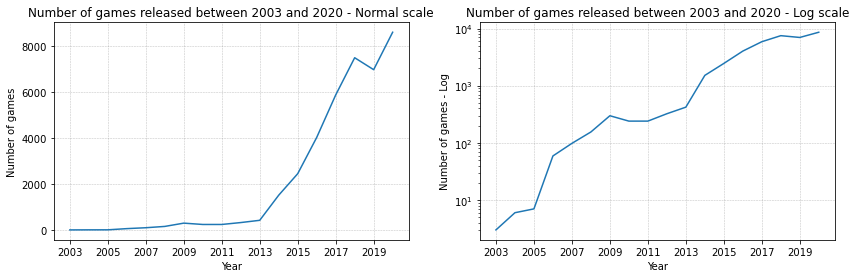

In [19]:
#games released since launch of the platform to 2020 - Exponential growth of the gaming platform 
fig, gby_plot = plt.subplots(1, 2, figsize=(14,4))
gby_plot[0].plot(game_by_year.loc["2020":"2003"])
gby_plot[0].grid(color="gray", alpha=0.5, linestyle="dashed", linewidth=0.5)
gby_plot[0].set_title("Number of games released between 2003 and 2020 - Normal scale")
gby_plot[0].set_xticks(range(2003, 2020, 2))
gby_plot[0].set_xlabel("Year")
gby_plot[0].set_ylabel("Number of games")

gby_plot[1].plot(game_by_year.loc["2020":"2003"])
gby_plot[1].set_yscale("log")
gby_plot[1].grid(color="gray", alpha=0.5, linestyle="dashed", linewidth=0.5)
gby_plot[1].set_title("Number of games released between 2003 and 2020 - Log scale")
gby_plot[1].set_xticks(range(2003, 2020, 2))
gby_plot[1].set_xlabel("Year")
gby_plot[1].set_ylabel("Number of games - Log")
gby_plot

Text(0.5, 1.0, 'Number of games released by day of the week')

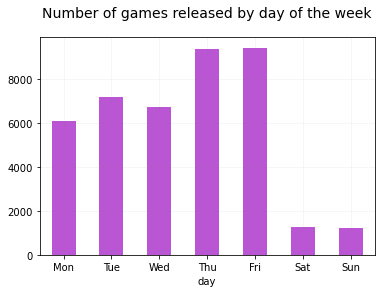

In [20]:
#games released by day of the week between 1997 to 2020 - Majority of games are released on weekdays(more releases towards the end of the week)
dmap = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
df["day"] = list(map(dmap.get, df["day"]))
day_order = [ "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
gbw_plot = df.groupby("day").size().reindex(day_order).plot(kind="bar", grid=True, color = "mediumorchid", rot=0)
gbw_plot.grid(color="gray", alpha=0.2, linestyle="dashed", linewidth=0.5)
gbw_plot.set_title("Number of games released by day of the week", pad=20, size=14)

In [21]:
#games released in 2020 (days vs. month)
games_2020 = df[df["year"] == 2020].groupby(["day", "month"]).size().unstack(level=-1)
games_2020

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
Fri,171,129,136,126,193,127,214,181,133,213,168,143
Mon,81,92,101,72,87,113,76,136,98,94,145,128
Sat,29,40,29,28,45,17,45,39,19,34,21,26
Sun,32,26,26,26,43,29,38,35,26,19,48,41
Thu,126,154,126,155,149,163,175,168,179,238,177,160
Tue,91,90,112,98,101,136,110,100,158,134,106,174
Wed,82,87,70,129,111,84,134,96,143,132,121,117


Text(0.5, 1.0, 'Game releases in 2020')

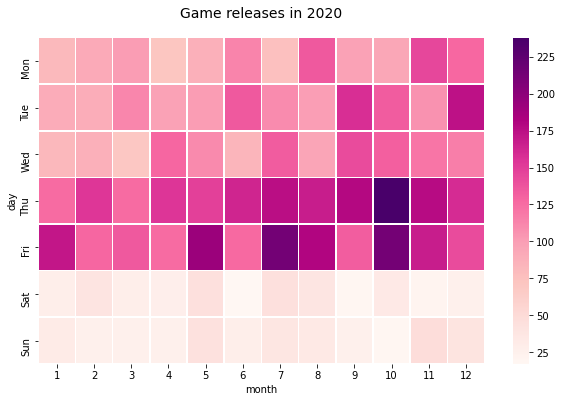

In [22]:
#games released in 2020 heat map - 238 titles released on Thursdays of October
fig, released_2020 = plt.subplots(figsize=(10, 6))
released_2020 = sns.heatmap(games_2020.reindex(day_order), cmap="RdPu", linewidth=0.5)
released_2020.set_title("Game releases in 2020" , pad=20, size=14)

# Analysis of the games from Steam released on various platforms 
The most common gaming platforms includes: Windows, Mac and Linux

In [23]:
#different kind of gaming platforms available for various games
df["platforms"].value_counts().to_frame()

,platforms
windows,29648
"windows, mac, linux",5641
"windows, mac",4951
"windows, linux",1165
mac,4
linux,1
"mac, linux",1


In [24]:
#games that supports mac, mac & linux and linux only
df[(df["platforms"] == "mac") | (df["platforms"] == "linux") | (df["platforms"] == "mac, linux")][["name", "release_date", "platforms", "final_price"]].sort_values(by=["platforms"])

,name,release_date,platforms,final_price
21335,PICNIC,2018-03-04,linux,0.00
1576,Call of Duty: Black Ops - Mac Edition,2012-09-27,mac,0.00
12781,Paul Pixel - The Awakening,2017-01-09,mac,4.65
17219,MobileZombie,2017-10-13,mac,0.00
22629,Escape Code - Coding Adventure,2018-05-03,mac,11.49
13703,Arma: Cold War Assault Mac/Linux,2017-03-14,"mac, linux",6.49


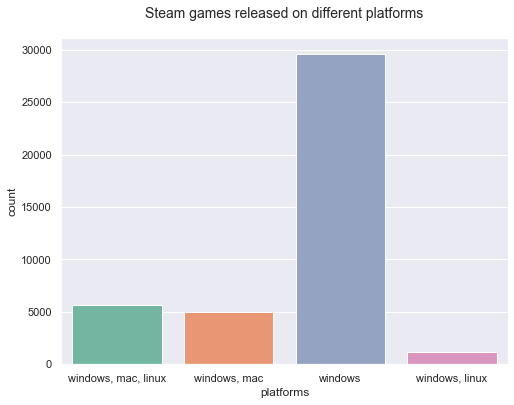

In [25]:
#break down of released games on different platforms - mac, mac & linux, and linux removed
sns.set_theme(style="darkgrid")
fig, platform_plot = plt.subplots(figsize=(8, 6))
select_data = df[-((df.platforms == "mac") | (df.platforms == "mac, linux") | (df.platforms == "linux"))]
platform_plot = sns.countplot(x="platforms", data=select_data.sort_index(), palette="Set2").set_title("Steam games released on different platforms", pad=20, size=14)

Text(0, 0.5, 'Number of games')

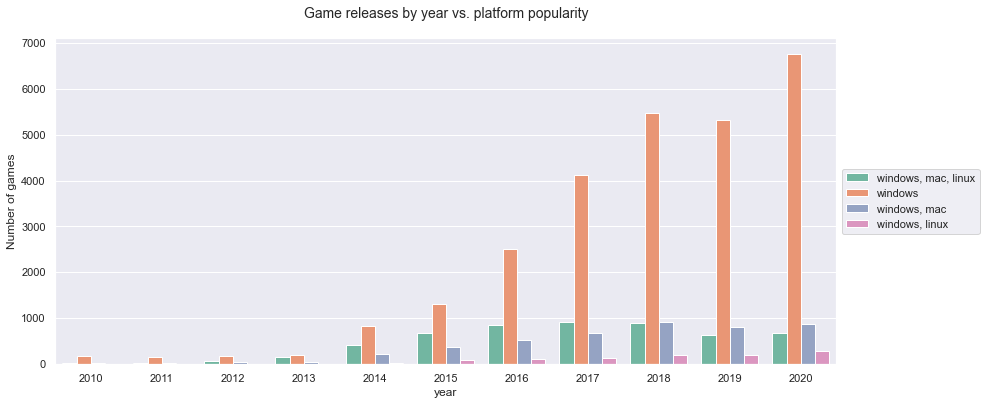

In [26]:
#games released vs. different platforms between 2010 to 2020
fig, game_vs_platforms = plt.subplots(figsize=(14, 6))
select_data = df[-((df.platforms == "mac") | (df.platforms == "mac, linux") | (df.platforms == "linux") | (df.year < 2010) | (df.year > 2020))]
game_vs_platforms = sns.countplot(x="year", data=select_data, hue="platforms", palette="Set2")
game_vs_platforms.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), ncol=1)
game_vs_platforms.set_title("Game releases by year vs. platform popularity", pad=20, size=14)
game_vs_platforms.set_ylabel("Number of games")

# Analysis of the overall price of Steam games as of May 16 2021

In [27]:
#the 10 most expensive games on Steam as of May 16 2021
df.sort_values(["final_price"], ascending=False)[["name","release_date", "initial_price", "discount%", "final_price"]].head(10)

,name,release_date,initial_price,discount%,final_price
34432,Ascent Free-Roaming VR Experience,2019-12-27,1500.00,0,1500.00
10323,Houdini Indie,2018-10-10,349.99,0,349.99
2307,Aartform Curvy 3D 3.0,2013-11-12,339.90,0,339.90
34946,浮世万千之前世今生,2020-01-27,250.00,0,250.00
26333,Jam Studio VR - Education & Health Care Edition,2018-10-23,226.99,0,226.99
13370,GameMaker Studio 2 Mobile,2017-03-08,226.99,0,226.99
13369,GameMaker Studio 2 UWP,2017-03-08,226.99,0,226.99
15195,VRemedies - MRI Procedure Experience,2018-05-09,226.99,0,226.99
8352,3DF Zephyr Lite Steam Edition,2016-02-02,226.99,0,226.99
15348,CrisisActionVR,2017-09-11,226.99,0,226.99


In [28]:
#top 10 most discounted games on steam as of May 16 2021
df["discount%"] = df["discount%"].replace(100,0)
df.sort_values(["discount%"], ascending=False)[["name","release_date", "initial_price", "discount%", "final_price"]].head(10)

,name,release_date,initial_price,discount%,final_price
17882,Square Head Zombies - FPS Game,2018-03-22,11.90,90,1.19
19964,Twine3D,2017-12-26,6.69,90,0.66
30501,TUTUTUTU - Tea party,2019-08-14,18.49,90,1.84
3658,Trapped Dead: Lockdown,2015-03-20,10.99,90,1.09
7760,Deponia Doomsday,2016-03-01,21.99,90,2.19
39149,Space Empires: Starfury,2020-08-03,11.49,90,1.14
23661,DayD: Through time. Jurassic Rush,2018-07-17,17.49,90,1.74
23128,Dark SASI,2018-05-18,7.99,90,0.79
24168,Leviathan,2018-07-02,6.69,90,0.66
2181,Blackguards,2014-01-22,124.99,90,12.49


In [29]:
#current percentage of game on sale on Steam as of May 16 2021
labels = ["Not on sale","On sale"]
df["sale"] = pd.cut(df["discount%"], [0,0.5,90], labels=labels, include_lowest=True)
df["sale"].value_counts().to_frame().rename(columns={"sale": "Number of games"})

,Number of games
Not on sale,39493
On sale,1918


In [30]:
#Break down of all games on sale by percentage off
labels = ["1 to 10 percent off","11 to 50 percent off", "51 to 80 percent off", ">81 percent off"]
df["discount_range"] = pd.cut(df["discount%"], [1,10,50,80,100], labels=labels, include_lowest=True)

In [31]:
df["discount_range"].value_counts().to_frame().rename(columns={"discount_range": "Number of games"}).sort_index()

,Number of games
1 to 10 percent off,27
11 to 50 percent off,991
51 to 80 percent off,636
>81 percent off,264


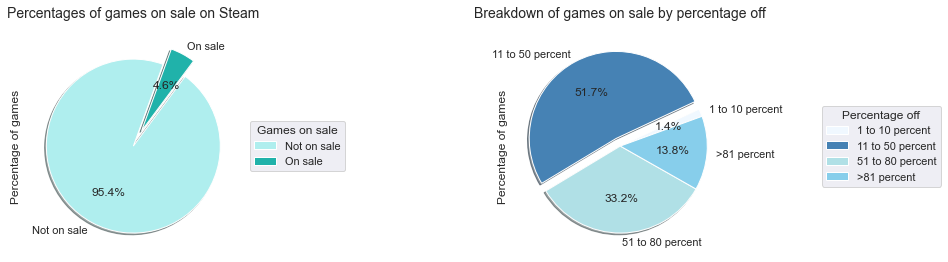

In [32]:
#Pie chart of games on sale and their relative % of discount as of May 16 2021
fig, sale_plot = plt.subplots(1, 2, figsize=(16,4))
sale_labels = ["Not on sale", "On sale"]
my_colors_1 = ["paleturquoise", "lightseagreen"]
my_colors_2 = ["aliceblue", "steelblue", "powderblue", "skyblue"]
sale_plot[0].pie(df["sale"].value_counts(), autopct="%1.1f%%", startangle=70, shadow = True, explode = (0, 0.2), labels=sale_labels, colors=my_colors_1)
sale_plot[0].set_title("Percentages of games on sale on Steam", pad=20, size=14)
sale_plot[0].set_ylabel("Percentage of games")
sale_plot[0].legend(title="Games on sale", loc="center right", bbox_to_anchor=(1.5, 0.5))

percent_labels = ["1 to 10 percent", "11 to 50 percent", "51 to 80 percent", ">81 percent"]
sale_plot[1].pie(df["discount_range"].value_counts().sort_index(), autopct="%1.1f%%", startangle=20, shadow = True, explode = (0, 0.1, 0, 0), labels=percent_labels, colors=my_colors_2)
sale_plot[1].set_title("Breakdown of games on sale by percentage off", pad=20, size=14)
sale_plot[1].set_ylabel("Percentage of games")
sale_plot[1].legend(title="Percentage off", loc="center right", bbox_to_anchor=(2.0, 0.5))

# Analysis of the different languages supported by games on Steam

In [33]:
#game language support by percentages
df["num_languages"].value_counts().sort_index()
labels = ["1", "2", "3", "4 or more"]
df["sort_languages"] = pd.cut(df["num_languages"], [0,1.9,2.9,3.9, 100], labels=labels, include_lowest=True)
df["sort_languages"].value_counts().to_frame().rename(columns={"sort_languages": "Number of games"}).sort_index()

,Number of games
1,23419
2,5106
3,1912
4 or more,10974


Text(0.5, 1.0, 'Breakdown of games with various numbers of supporting languages')

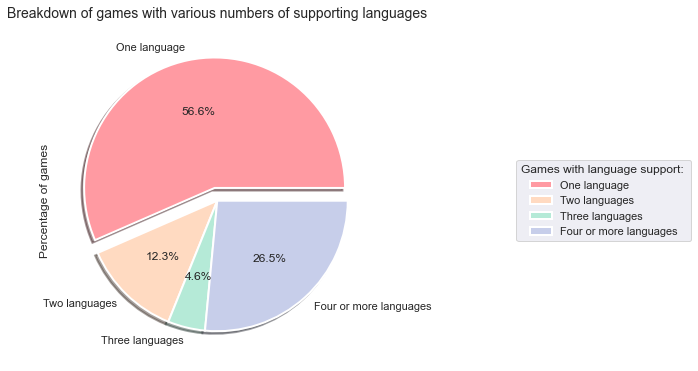

In [34]:
fig, ax = plt.subplots(figsize=(7,6))
my_colors = ["#FF9AA2", "#FFDAC1", "#B5EAD7", "#C7CEEA"]
labels = ["One language", "Two languages", "Three languages", "Four or more languages"]
ax.pie(df["sort_languages"].value_counts().sort_index(), autopct="%1.1f%%", labels=labels, shadow=True, explode=(0.1, 0, 0, 0), colors=my_colors, wedgeprops={'linewidth': 2})
ax.legend(title="Games with language support: ", loc="center left", bbox_to_anchor=(1.4, 0.5), ncol=1)
ax.set_ylabel("Percentage of games")
ax.set_title("Breakdown of games with various numbers of supporting languages", pad=20, size=14)

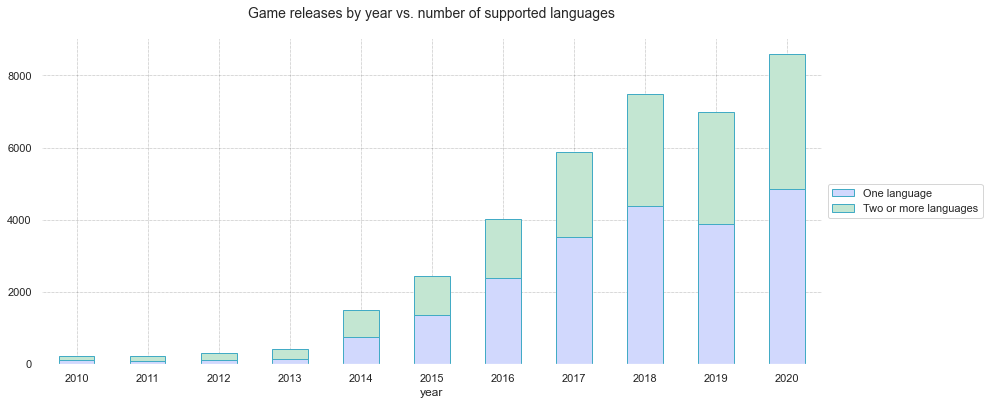

In [35]:
#number of games released vs. number of supporting languages between 2010 to 2020
labels = ["One language", "Two or more languages"]
df["sort_languages"] = pd.cut(df["num_languages"], [0,1.9,100], labels=labels, include_lowest=True)
new_df = df.groupby(["year", "sort_languages"]).size().unstack(level=-1)
my_colors = ["#D1D8FD", "#C3E6D2"]
ax = new_df[13:-1].plot(kind="bar", stacked=True, rot=0, figsize=(14, 6), color=my_colors, alpha=1, edgecolor="#42ABC5", linewidth=1)
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), ncol=1, facecolor="white")
ax.set_title("Game releases by year vs. number of supported languages", pad=20, size=14)
ax.grid(color="black", alpha=0.6, linestyle=":", linewidth=0.5)
ax.set_facecolor("white")

In [36]:
#most common languages supported by games published on Steam
df["languages"] = df.supported_languages.apply(lambda x: x.split(','))
new_df = df.explode("languages")
breakdown = new_df["languages"].str.strip().replace("Englishb", "English").value_counts().head(10)
breakdown[5] = breakdown.iloc[4:].sum()
breakdown.rename(index={"Simplified Chinese": "Other languages"})[:6].to_frame()

,languages
English,40185
German,10529
French,10014
Russian,9573
Spanish - Spain,9141
Other languages,41015


In [37]:
df.drop(["languages"], axis=1, inplace=True)

# Analysis of the different genres tagged by games released on Steam

In [38]:
#top ten most commonly tagged genres by games released on Steam
df["list_of_genres"] = df.genres.apply(lambda x: x.split(','))
df["num_of_genres"] =  df["list_of_genres"].apply(lambda cat:len(cat))
new_df_2 = df.explode("list_of_genres")
genre_breakdown = new_df_2["list_of_genres"].str.strip().replace("Aventure", "Adventure").value_counts()
genre_breakdown.to_frame().rename(columns={"list_of_genres": "Number of games with tag"}).head(10)

,Number of games with tag
Indie,30154
Action,18139
Casual,16191
Adventure,15893
Strategy,8247
Simulation,8141
RPG,7157
Early Access,4735
Free to Play,3284
Sports,2077


Text(0, 0.5, 'Number of tags')

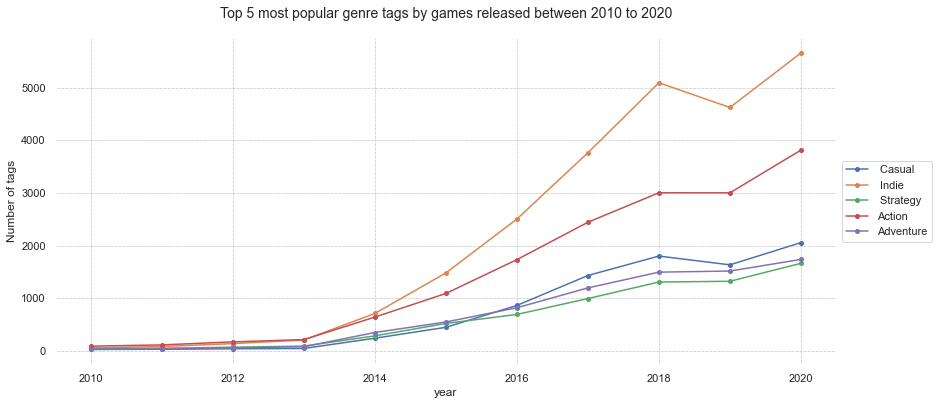

In [39]:
#top 5 most popular genres tagged by games released on steam between 2010 to 2020
genre_selected = new_df_2["list_of_genres"].value_counts().head(5).index
genre_data = new_df_2[new_df_2["list_of_genres"].isin(genre_selected)].groupby(["year","list_of_genres"]).size().unstack(level=-1)
ax = genre_data.loc["2010":"2020"].plot(kind="line", figsize=(14, 6), marker="o", markersize=4)
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), ncol=1, facecolor="white")
ax.set_title("Top 5 most popular genre tags by games released between 2010 to 2020", pad=20, size=14)
ax.grid(color="black", alpha=0.6, linestyle=':', linewidth=0.5)
ax.set_facecolor("white")
ax.set_xticks(range(2010, 2021, 2))
ax.set_ylabel("Number of tags")

# Analysis of the different categories tagged by games released on Steam

In [40]:
#top ten most commonly tagged categories by games released on Steam
df["list_of_categories"] = df.categories.apply(lambda x: x.split(','))
df["numb_of_categories"] = df["list_of_categories"].apply(lambda cat:len(cat))
new_df_3 = df.explode("list_of_categories")
category_breakdown = new_df_3["list_of_categories"].str.strip().value_counts()
category_breakdown.to_frame().rename(columns={"list_of_categories": "Number of games with tag"}).head(10)

,Number of games with tag
Single-player,39145
Steam Achievements,20934
Steam Cloud,10918
Multi-player,9298
Full controller support,8812
Steam Trading Cards,8389
Partial Controller Support,6235
PvP,5727
Steam Leaderboards,4576
Co-op,4342


Text(0, 0.5, 'Number of tags')

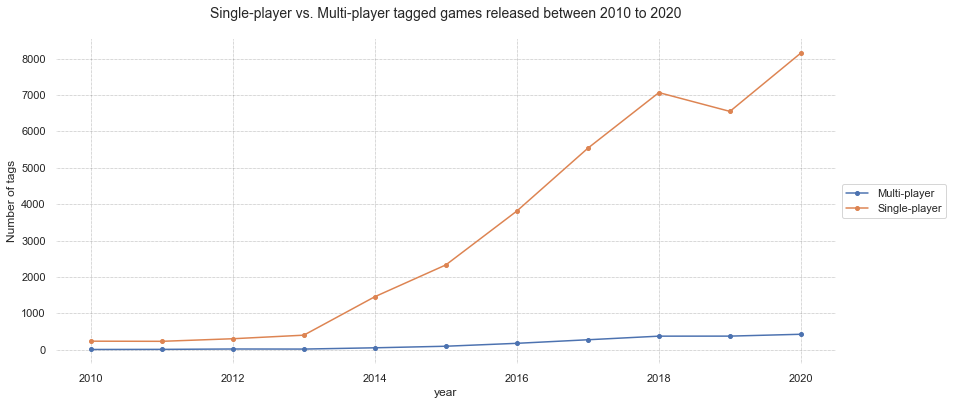

In [41]:
#single-player vs. multi-player tagged games released on Steam between 2010 to 2020
category_data = new_df_3[(new_df_3["list_of_categories"] == "Single-player") | (new_df_3["list_of_categories"] == "Multi-player")].groupby(["year","list_of_categories"]).size().unstack(level=-1)
ax = category_data.loc["2010":"2020"].plot(kind="line", figsize=(14, 6), marker="o", markersize=4)
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), ncol=1, facecolor="white")
ax.set_title("Single-player vs. Multi-player tagged games released between 2010 to 2020", pad=20, size=14)
ax.grid(color="black", alpha=0.6, linestyle=':', linewidth=0.5)
ax.set_facecolor("white")
ax.set_xticks(range(2010, 2021, 2))
ax.set_ylabel("Number of tags")

In [42]:
#Single-player tagged games between 2010 to 2020 vs. the top 5 most tagged genres
new_df = new_df_3.explode("list_of_genres")
genre_selected = new_df["list_of_genres"].value_counts().head(5).index
new_df = new_df[-((new_df.year < 2010) | (new_df.year > 2020))]
new_df = new_df[(new_df["list_of_genres"].isin(genre_selected)) & (new_df["list_of_categories"] == "Single-player")].groupby(["year","list_of_genres"]).size().unstack(level=-1)
new_df

list_of_genres,Adventure,Casual,Indie,Strategy,Action
year,,,,,
2010,23,21,49,35,79
2011,21,25,76,43,102
2012,49,34,127,61,153
2013,83,40,191,83,197
2014,223,227,673,268,602
2015,397,427,1422,500,1018
2016,654,827,2391,650,1622
2017,1051,1378,3574,922,2253
2018,1228,1718,4844,1221,2755


Text(0, 0.5, 'Number of tags')

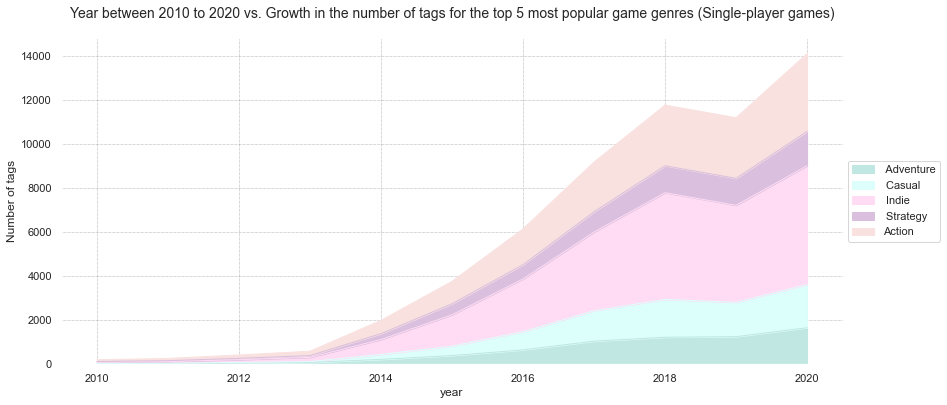

In [43]:
#Single-player tagged games between 2010 to 2020 vs. the top 5 most popular genres - graph
my_colors=["#C1E7E3", "#DCFFFB", "#FFDCF4", "#DABFDE", "#f9E1E0"]
ax = new_df.plot(kind="area", stacked=True, figsize=(14, 6), rot=0, color=my_colors, alpha=1,linewidth=1)
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), ncol=1, facecolor="white")
ax.set_title("Year between 2010 to 2020 vs. Growth in the number of tags for the top 5 most popular game genres (Single-player games)", pad=20, size=14)
ax.grid(color="black", alpha=0.6, linestyle=':', linewidth=0.5)
ax.set_facecolor("white")
ax.set_ylabel("Number of tags")

In [44]:
#Multi-player tagged games between 2010 to 2020 vs. the top 5 most tagged genres
new_df = new_df_3.explode("list_of_genres")
genre_selected = new_df["list_of_genres"].value_counts().head(5).index
new_df = new_df[-((new_df.year < 2010) | (new_df.year > 2020))]
new_df = new_df[(new_df["list_of_genres"].isin(genre_selected)) & (new_df["list_of_categories"] == "Multi-player")].groupby(["year","list_of_genres"]).size().unstack(level=-1)
new_df

list_of_genres,Adventure,Casual,Indie,Strategy,Action
year,,,,,
2010,NaN,NaN,2.0,1.0,5.0
2011,1.0,NaN,1.0,1.0,5.0
2012,2.0,NaN,6.0,3.0,13.0
2013,1.0,NaN,8.0,2.0,12.0
2014,5.0,8.0,33.0,11.0,33.0
2015,13.0,16.0,54.0,14.0,67.0
2016,16.0,31.0,111.0,36.0,108.0
2017,36.0,46.0,183.0,63.0,186.0
2018,49.0,81.0,246.0,80.0,244.0


Text(0, 0.5, 'Number of tags')

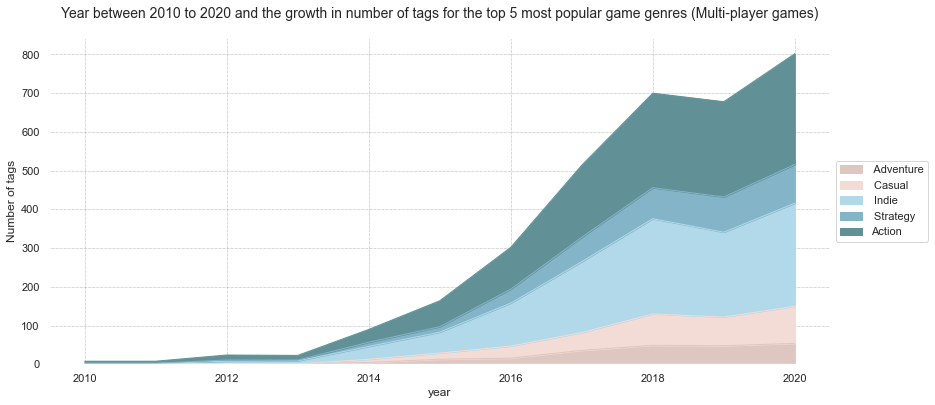

In [45]:
#Multi-player tagged games between 2010 to 2020 vs. the top 5 most popular genres - graph
my_colors=["#DFC7C1", "#F4DCD6", "#B2D9EA", "#84B4C8", "#619196"]
ax = new_df.plot(kind="area", stacked=True, figsize=(14, 6), rot=0, color=my_colors, alpha=1,linewidth=1)
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), ncol=1, facecolor="white")
ax.set_title("Year between 2010 to 2020 and the growth in number of tags for the top 5 most popular game genres (Multi-player games)", pad=20, size=14)
ax.grid(color="black", alpha=0.6, linestyle=":", linewidth=0.5)
ax.set_facecolor("white")
ax.set_ylabel("Number of tags")

# Analysis of weighted ratings of games on Steam as of May 16 2021
Game ratings are weighted due to the fact that newer games with fewer reviews are more likely to be viewed as favorable in a general rating scale compare to games with many more numbers of reviews. 

The lower bound of the confidence interval is generated with the Wilson score and 95% confidence. 

In [46]:
df["min_owners"] = df["owners"].apply(lambda num:num.split("..")[0]).apply(lambda num:num.replace(',', '')).astype('int64')
df["max_owners"] = df["owners"].apply(lambda num:num.split("..")[-1]).apply(lambda num:num.replace(',', '')).astype('int64')
df["avg_owners"] = (df["max_owners"] + df["min_owners"])//2
df["total_review"] = df["positive"] + df["negative"]
df["rating"] = np.where(df["total_review"]>0, df["positive"]/df["total_review"], np.NaN) * 100
df["rating"] = round(df["rating"], 2)

In [47]:
#creating ratings column base on the Wilson score confidence interval with 95% confidence (total_review <10 as nan)
import math
import scipy.stats as st

def find_cl(positive, n):
    if n <10:
        return np.nan
    else:
        z = st.norm.ppf(1 - (1 - 0.95) / 2)
        p_hat = 1.0 * positive / n
        return (p_hat + z * z / (2 * n) - z * math.sqrt((p_hat * (1 - p_hat) + z * z / (4 * n)) / n)) / (1 + z * z / n)
df["weighted_rating"] = df.apply(lambda x:find_cl(x.positive, x.total_review), axis=1) * 100
df["weighted_rating"] = round(df["weighted_rating"], 2)
#top ten games on Steam based on weighted_rating
df.sort_values(["weighted_rating"], ascending=False)[["name", "steam_appid", "release_date", "avg_owners", "positive", "negative", "total_review", "rating", "weighted_rating"]].head(10)

,name,steam_appid,release_date,avg_owners,positive,negative,total_review,rating,weighted_rating
35314,ULTRAKILL,1229490,2020-09-03,750000,7971,46,8017,99.43,99.24
32714,Senren＊Banka,1144400,2020-02-14,75000,6121,41,6162,99.33,99.10
23246,Flowers -Le volume sur ete-,858940,2018-07-26,10000,625,1,626,99.84,99.10
29885,A Short Hike,1055540,2019-07-30,150000,6890,54,6944,99.22,98.99
7912,Factorio,427520,2020-08-14,3500000,114583,1254,115837,98.92,98.86
42399,Aventura Copilului Albastru și Urât,1530140,2021-02-08,75000,1461,9,1470,99.39,98.84
31339,Touhou Fuujinroku ~ Mountain of Faith.,1100140,2020-06-05,35000,323,0,323,100.00,98.82
36401,pureya,1268960,2021-03-26,75000,1370,9,1379,99.35,98.76
31011,The Henry Stickmin Collection,1089980,2020-08-07,750000,22303,251,22554,98.89,98.74
23,Portal 2,620,2011-04-18,15000000,244756,3022,247778,98.78,98.74


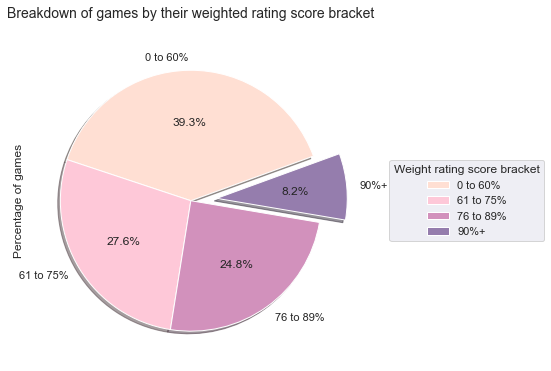

In [48]:
dev=df["developers"].value_counts().head(10).index
labels=["0-60%", "61-75%", "76-89%", "90%+"]
my_colors_2 = ["#FFDFD3", "#FEC8D8", "#D291BC", "#957DAD"]
#break down of released games base on their weighted rating
fig, ax = plt.subplots(figsize=(7,6))
percent_labels = ["0 to 60%", "61 to 75%", "76 to 89%", "90%+"]
df["sort_rating"] = pd.cut(df["weighted_rating"], [1,60,75,90,100], labels=labels)
ax.pie(df["sort_rating"].value_counts(), autopct="%1.1f%%", startangle=20, shadow = True, explode = (0, 0, 0, 0.2), labels=percent_labels, colors=my_colors_2)
ax.set_title("Breakdown of games by their weighted rating score bracket", pad=20, size=14)
ax.set_ylabel("Percentage of games")
ax.legend(title="Weight rating score bracket", loc="center right", bbox_to_anchor=(1.6, 0.5))

In [49]:
#ten developers with the most number of games released on Steam as of May 16 2021 and their respective weighted rating brackets for their released games
dev_w_df = df[df["developers"].isin(dev)].groupby(["developers", "sort_rating"]).size().to_frame()
dev_w_df.unstack(level=-1).droplevel(0, axis=1) 

sort_rating,0-60%,61-75%,76-89%,90%+
developers,,,,
AMAX Interactive,1,3,1,0
Blender Games,38,14,4,0
Boogygames Studios,12,2,2,0
Choice of Games,32,25,20,2
Creobit,11,11,5,0
Hosted Games,14,12,10,2
"KOEI TECMO GAMES CO., LTD.",19,19,24,6
Laush Dmitriy Sergeevich,32,12,2,0
Ripknot Systems,55,0,0,0


Text(0, 0.5, 'Number of games')

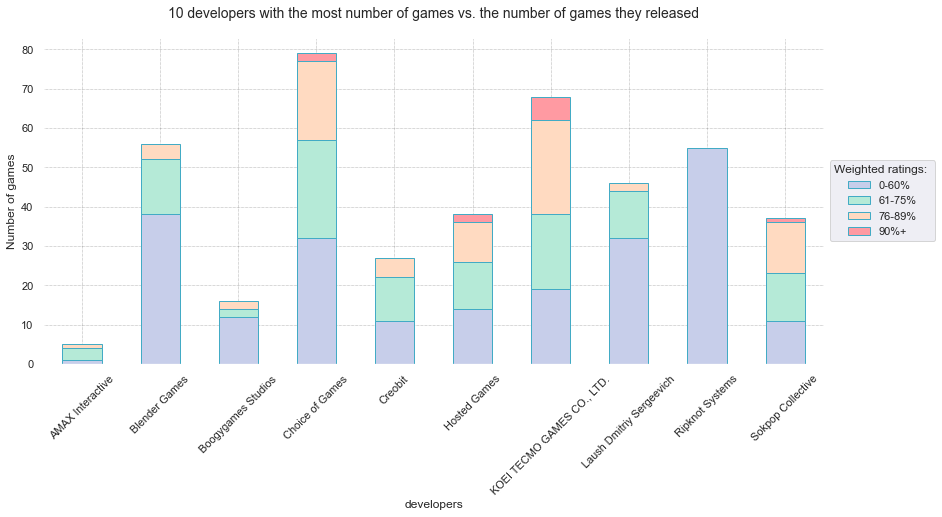

In [50]:
#general comparison of the ten developers with the most number of games on Steam and their respective weighted rating score
labels=["0-60%", "61-75%", "76-89%", "90%+"]
colors = ["#C7CEEA", "#B5EAD7", "#FFDAC1", "#FF9AA2"]
ax = dev_w_df.unstack(level=-1).plot(kind="bar", stacked=True, rot=45, figsize=(14, 6), color=colors, alpha=1, edgecolor="#42ABC5", linewidth=1)
ax.legend(title="Weighted ratings: ", loc="center left", labels=labels, bbox_to_anchor=(1.0, 0.5), ncol=1)
ax.set_title("10 developers with the most number of games vs. the number of games they released", pad=20, size=14)
ax.grid(color="black", alpha=0.6, linestyle=":", linewidth=0.5)
ax.set_facecolor("white")
ax.set_ylabel("Number of games")

In [51]:
#developers with the most number of highly reviewed game Steam as of May 16 2021 and their respective weighted rating brackets for their released games.
dev = df.groupby(["developers", "sort_rating"]).count()["name"].to_frame().sort_values(by=["sort_rating", "name"], ascending=False)
dev = dev.head(10).unstack(level=-1).head(10).index.to_list()
dev_w_df_p = df[df["developers"].isin(dev)].groupby(["developers", "sort_rating"]).size().to_frame().rename(index={"上海アリス幻樂団": "Team Shanghai Alice"})
dev_w_df_p.unstack(level=-1).droplevel(0, axis=1) 

sort_rating,0-60%,61-75%,76-89%,90%+
developers,,,,
07th Expansion,0,0,1,9
Artifex Mundi,3,0,6,10
Frontwing,0,2,10,9
Humongous Entertainment,6,3,17,9
Nihon Falcom,0,3,6,10
"PopCap Games, Inc.",0,2,8,11
Quiet River,1,1,6,16
Team Shanghai Alice,0,1,1,9
Valve,1,2,8,17


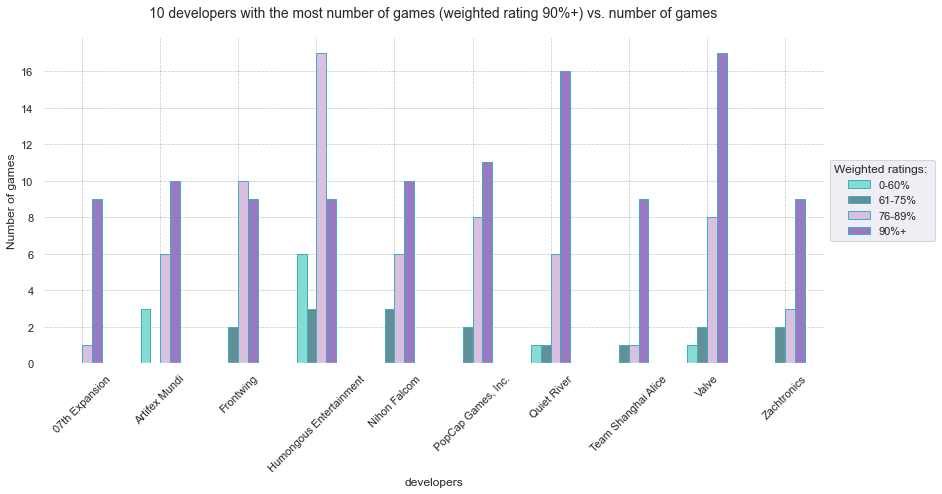

In [52]:
#general comparison of the ten developers with the most number games (weighted rating 90%+) on Steam and the distribution of their released games
labels=["0-60%", "61-75%", "76-89%", "90%+"]
colors = ["#85DDD1", "#619196", "#DABFDE", "#9979C1"]
ax = dev_w_df_p.unstack(level=-1).plot(kind="bar", stacked=False, rot=45, figsize=(14, 6), color=colors, alpha=1, edgecolor="#42ABC5", linewidth=1)
ax.legend(title="Weighted ratings: ", loc="center left", labels=labels, bbox_to_anchor=(1.0, 0.5), ncol=1)
ax.set_title("10 developers with the most number of games (weighted rating 90%+) vs. number of games", pad=20, size=14)
ax.grid(color="black", alpha=0.6, linestyle=":", linewidth=0.5)
ax.set_facecolor("white")
ax.set_ylabel("Number of games")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Analysis of publishers on Steam

In [53]:
#top 10 publishers with the most number of games published
df["publishers"].value_counts().to_frame().head(10)

,publishers
Big Fish Games,356
Strategy First,143
Ubisoft,123
Sekai Project,114
THQ Nordic,113
Square Enix,113
Choice of Games,113
Plug In Digital,97
1C Entertainment,97
Laush Studio,94


In [54]:
#publishers with the most number of highly reviewed game Steam as of May 16 2021 and their respective weighted rating brackets for their published games.
pub = df.groupby(["publishers", "sort_rating"]).count()["name"].to_frame().sort_values(by=["sort_rating", "name"], ascending=False)
pub = pub.head(10).unstack(level=-1).head(10).index.to_list()
pub_w_df_p = df[df["publishers"].isin(pub)].groupby(["publishers", "sort_rating"]).size().to_frame()
pub_w_df_p.unstack(level=-1).droplevel(0, axis=1) 

sort_rating,0-60%,61-75%,76-89%,90%+
publishers,,,,
Degica,25,21,22,16
Devolver Digital,5,10,38,29
Electronic Arts,5,17,36,14
MangaGamer,5,1,25,16
Quiet River,1,1,6,16
SEGA,9,11,44,24
Sekai Project,15,20,39,34
Square Enix,24,33,40,16
Valve,1,2,10,20


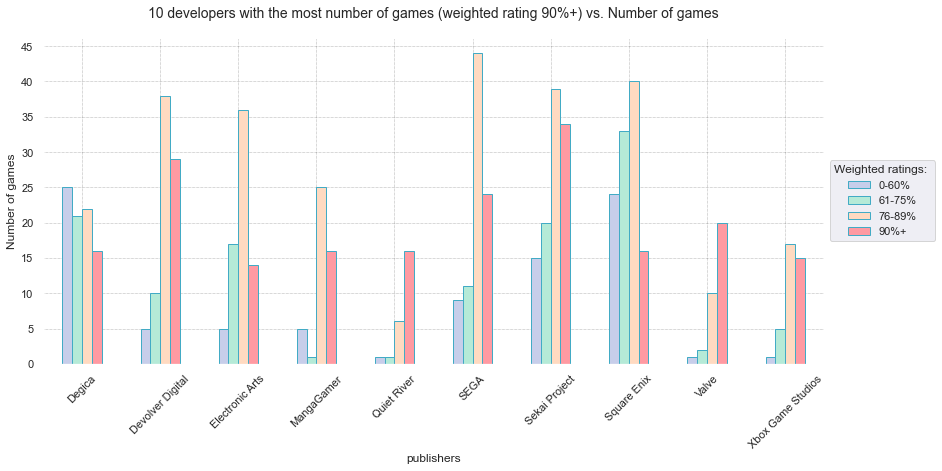

In [55]:
#general comparison of the ten publishers with the most number of games (weighted rating 90%+) on Steam and the distribution of their published games
labels=["0-60%", "61-75%", "76-89%", "90%+"]
colors = ["#C7CEEA", "#B5EAD7", "#FFDAC1", "#FF9AA2"]
ax = pub_w_df_p.unstack(level=-1).plot(kind="bar", stacked=False, rot=45, figsize=(14, 6), color=colors, alpha=1, edgecolor="#42ABC5", linewidth=1)
ax.legend(title="Weighted ratings: ", loc="center left", labels=labels, bbox_to_anchor=(1.0, 0.5), ncol=1)
ax.set_title("10 developers with the most number of games (weighted rating 90%+) vs. Number of games", pad=20, size=14)
ax.grid(color="black", alpha=0.6, linestyle=":", linewidth=0.5)
ax.set_facecolor("white")
ax.set_ylabel("Number of games")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Analysis of games based on total_review and ccu

In [56]:
#top ten games by popularity based on estimated average owners
df.sort_values(["avg_owners"], ascending=False)[["name", "steam_appid", "release_date", "avg_owners", "total_review", "rating", "weighted_rating"]].head(10)

,name,steam_appid,release_date,avg_owners,total_review,rating,weighted_rating
22,Dota 2,570,2013-07-09,150000000,1498578,84.18,84.12
19,Team Fortress 2,440,2007-10-10,75000000,778325,93.93,93.87
13143,PLAYERUNKNOWNS BATTLEGROUNDS,578080,2017-12-21,75000000,1718318,54.20,54.13
25,Counter-Strike: Global Offensive,730,2012-08-21,75000000,5552525,88.11,88.08
21,Left 4 Dead 2,550,2009-11-16,35000000,490740,97.28,97.23
2749,Grand Theft Auto V,271590,2015-04-13,35000000,1096849,82.50,82.42
5531,Tom Clancys Rainbow Six® Siege,359550,2015-12-01,35000000,913880,88.09,88.02
14,Half-Life 2: Lost Coast,340,2005-10-27,35000000,9159,87.08,86.38
1249,Terraria,105600,2011-05-16,35000000,737545,97.93,97.90
3233,Brawlhalla,291550,2017-10-17,35000000,220764,84.86,84.71


In [57]:
#top ten games by popularity based on Concurrently Connected users as of May 16 2021
df.sort_values(by="ccu", ascending=False)[["name", "steam_appid", "release_date", "avg_owners", "ccu", "total_review", "rating", "weighted_rating"]].head(10)

,name,steam_appid,release_date,avg_owners,ccu,total_review,rating,weighted_rating
25,Counter-Strike: Global Offensive,730,2012-08-21,75000000,927955,5552525,88.11,88.08
22,Dota 2,570,2013-07-09,150000000,573999,1498578,84.18,84.12
13143,PLAYERUNKNOWNS BATTLEGROUNDS,578080,2017-12-21,75000000,366401,1718318,54.20,54.13
33600,Apex Legends™,1172470,2020-11-04,35000000,246497,218599,90.76,90.64
2749,Grand Theft Auto V,271590,2015-04-13,35000000,115820,1096849,82.50,82.42
2268,Rust,252490,2018-02-08,35000000,111768,611976,86.23,86.15
19,Team Fortress 2,440,2007-10-10,75000000,102763,778325,93.93,93.87
30885,Destiny 2,1085660,2019-10-01,15000000,101420,363486,85.17,85.06
2284,Rocket League®,252950,2015-07-06,15000000,81167,522626,89.12,89.04
5531,Tom Clancys Rainbow Six® Siege,359550,2015-12-01,35000000,79031,913880,88.09,88.02


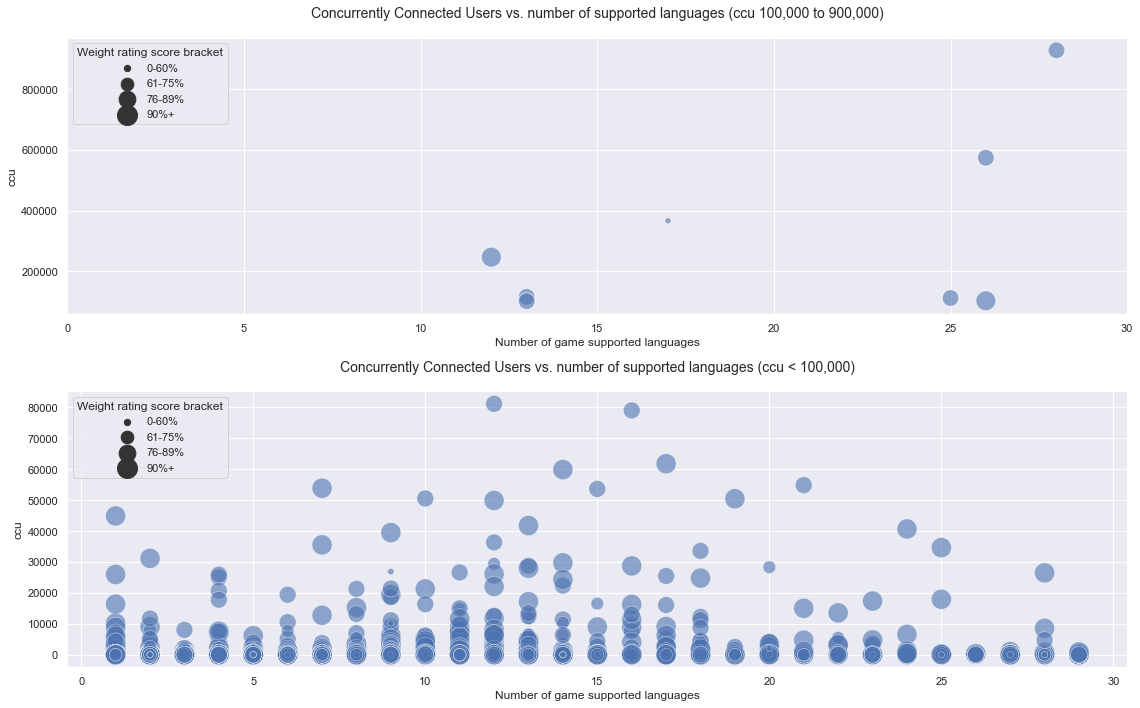

In [58]:
#relationship between concurrently connected users vs. the number of supported languages for games on Steam
fig, ax = plt.subplots(2, 1, figsize=(16,10))
sns.scatterplot(ax=ax[0], data=df[-(df.ccu < 100000)], y="ccu", x="num_languages", size="sort_rating", sizes=(400, 40), alpha=0.6)
ax[0].ticklabel_format(style="plain", axis='y')
ax[0].legend(title="Weight rating score bracket", loc="upper left")
ax[0].set_title("Concurrently Connected Users vs. number of supported languages (ccu 100,000 to 900,000)", pad=20, size=14)
ax[0].set_xlim(0, 30)
ax[0].set_xlabel("Number of game supported languages")

sns.scatterplot(ax=ax[1], data=df[-(df.ccu > 100000)], y="ccu", x="num_languages", size="sort_rating", sizes=(400, 40), alpha=0.6)
ax[1].ticklabel_format(style="plain", axis="y")
ax[1].legend(title="Weight rating score bracket", loc="upper left")
ax[1].set_title("Concurrently Connected Users vs. number of supported languages (ccu < 100,000)", pad=20, size=14)
ax[1].set_xlabel("Number of game supported languages")
plt.tight_layout()

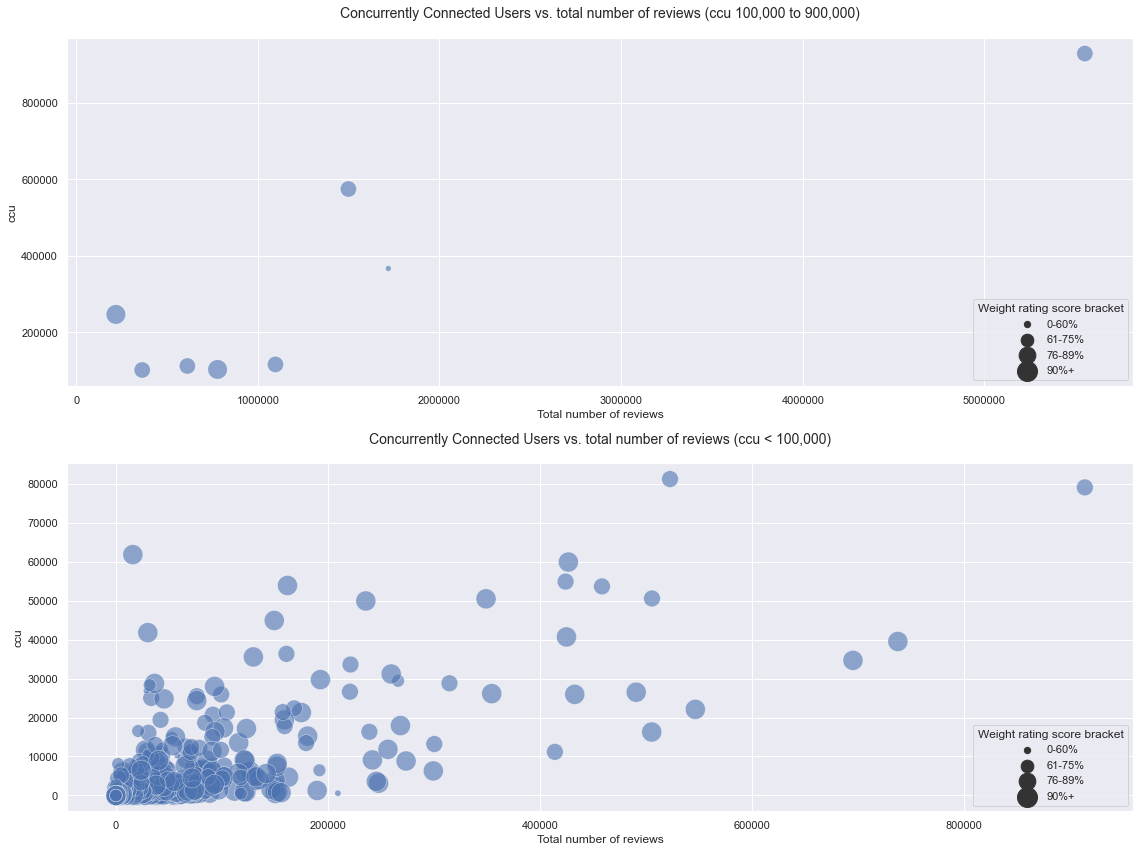

In [59]:
#relationship between concurrently connected users vs. the total number of reviews for games on Steam
fig, ax = plt.subplots(2, 1, figsize=(16,12))
sns.scatterplot(ax=ax[0], data=df[-(df.ccu < 100000)], y="ccu", x="total_review", size="sort_rating", sizes=(400, 40), alpha=0.6)
ax[0].ticklabel_format(style="plain", axis="y")
ax[0].legend(title="Weight rating score bracket", loc="lower right")
ax[0].set_title("Concurrently Connected Users vs. total number of reviews (ccu 100,000 to 900,000)", pad=20, size=14)
ax[0].ticklabel_format(useOffset=False, style='plain')
ax[0].set_xlabel("Total number of reviews")

sns.scatterplot(ax=ax[1], data=df[-(df.ccu > 100000)], y="ccu", x="total_review", size="sort_rating", sizes=(400, 40), alpha=0.6)
ax[1].ticklabel_format(style="plain", axis="y")
ax[1].legend(title="Weight rating score bracket", loc="lower right")
ax[1].set_title("Concurrently Connected Users vs. total number of reviews (ccu < 100,000)", pad=20, size=14)
ax[1].set_xlabel("Total number of reviews")

plt.tight_layout()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41411 entries, 0 to 42891
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 41411 non-null  object        
 1   steam_appid          41411 non-null  int64         
 2   supported_languages  41411 non-null  object        
 3   developers           41411 non-null  object        
 4   publishers           41411 non-null  object        
 5   platforms            41411 non-null  object        
 6   categories           41411 non-null  object        
 7   genres               41411 non-null  object        
 8   release_date         41411 non-null  datetime64[ns]
 9   positive             41411 non-null  int64         
 10  negative             41411 non-null  int64         
 11  owners               41411 non-null  object        
 12  ccu                  41411 non-null  int64         
 13  initial_price        41411 non-

In [61]:
df.drop(["list_of_genres", "list_of_categories"], axis=1, inplace=True)

In [62]:
#df written to a csv file
df.to_csv("new_steam_data.csv")